# Lab | Feature extraction
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### Instructions
1. Open the categoricals variable we created before.

        categoricals = data.select_dtypes(np.object)
        categoricals.head()

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

# 1. Open the categoricals variable we created before.

        categoricals = data.select_dtypes(np.object)
        categoricals.head()



In [4]:
df = pd.read_csv("/Users/kt/Desktop/Ironhack/Data-Analytics-Ironhack/unit-4/lab-cleaning-numerical-data/we_fn_use_c_marketing_customer_value_analysis.csv")

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
# standardize column name following PE8
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))] 

# check columns name
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [8]:
# change effective_to_date to datetime
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

# drop customer id column
df = df.drop(['customer'], axis=1)

In [9]:
# select categorical type

cat_df = df.select_dtypes(np.object)
cat_df.head(3)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


In [10]:
cat_df.shape

(9134, 14)

# 2. Plot all the categorical variables 
Plot all the categorical variables with the proper plot. 
What can you see?


In [11]:
# check nan
cat_df.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [12]:
# check empty space
cat_df.eq(' ').sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [13]:
# check value_counts for each column

for column in cat_df.columns:
    print("\n" + column)
    print(cat_df[column].value_counts())


state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response
No     7826
Yes    1308
Name: response, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

gender
F    4658
M    4476
Name: gender, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int

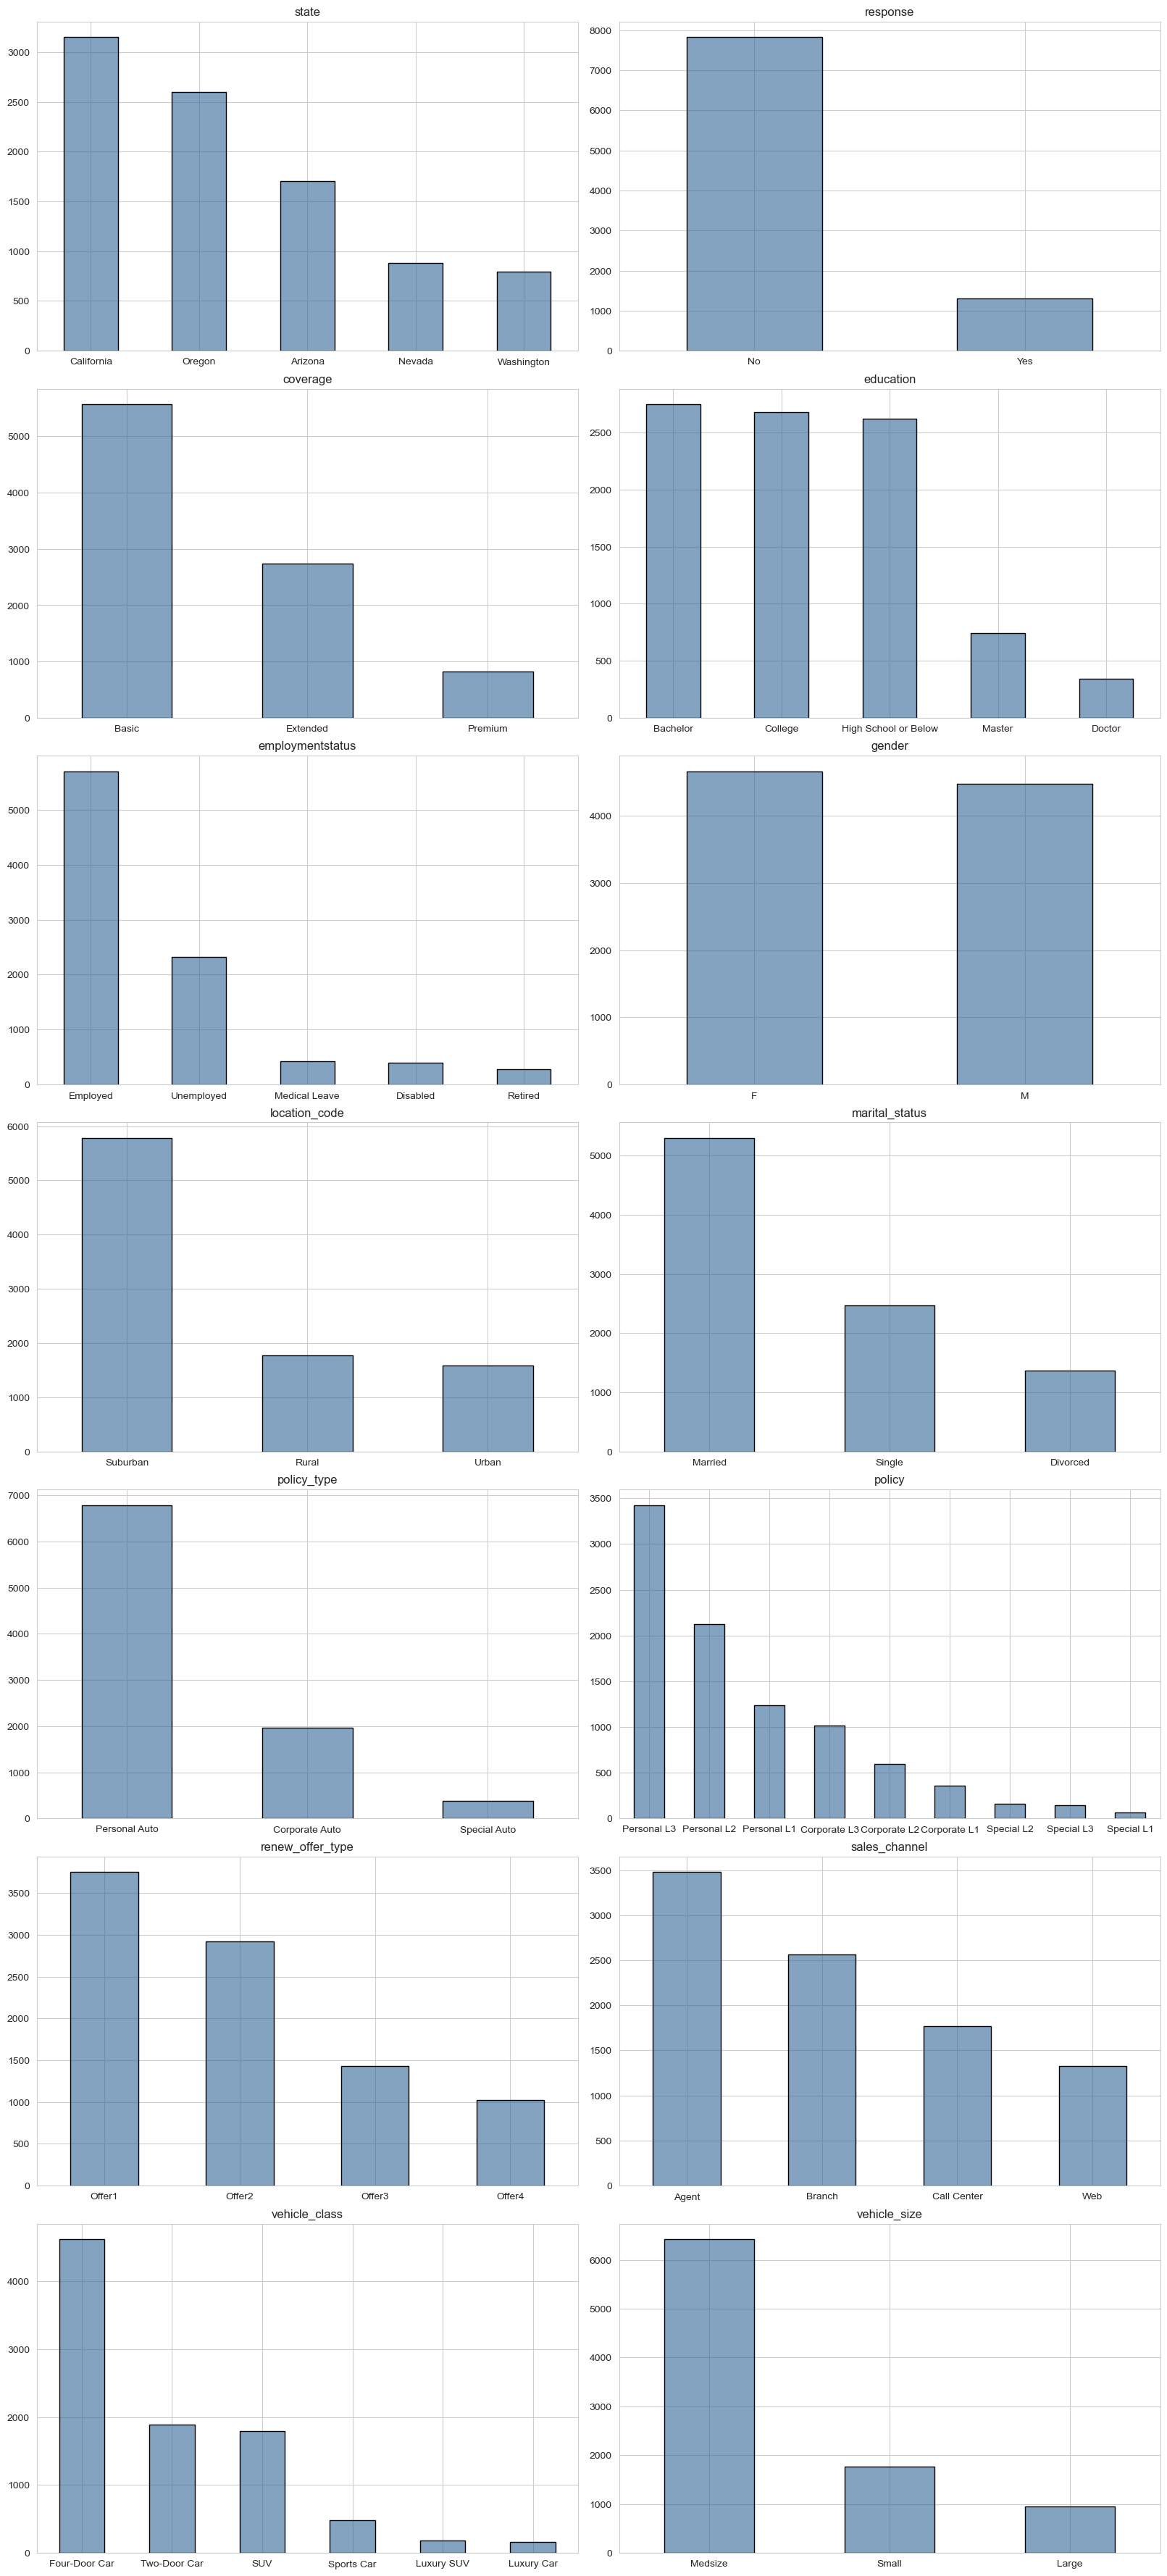

In [14]:
# bar plot for all categorical column (plot value_counts())

fig = plt.figure(figsize = (16, 40), constrained_layout = True)

for i, column in enumerate(cat_df.columns):
    fig.add_subplot(8, 2, i + 1) # plot in 8 rows, 2 columns
    cat_df[column].value_counts().plot.bar(title=column, rot=0, color=(0.2, 0.4, 0.6, 0.6), edgecolor='black') 
  

# 3. There might be some columns that seem to be redundant

Check their values to be sure. What should we do with them?


In [15]:
# As discussed in the previous lab that "Policy_type" and "Policy" are the same data. (types of "Policy" were grouped and put into a "Policy_type" column)
"""
Personal Auto = Personal L1 + Personal L2 + Personal L3
Corporate Auto = Corporate L1 + Corporate L2 + Corporate L3
Special Auto = Special L1 + Special L2 + Special L3
"""



'\nPersonal Auto = Personal L1 + Personal L2 + Personal L3\nCorporate Auto = Corporate L1 + Corporate L2 + Corporate L3\nSpecial Auto = Special L1 + Special L2 + Special L3\n'

In [16]:
cat_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [17]:
cat_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [18]:
# We can drop one of them

cat_df = cat_df.drop(['policy'], axis=1)
cat_df.head(3)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize


# 4. Plot time variable. 

In [19]:
numerical = df.select_dtypes('number')
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [20]:
numerical.shape

(9134, 8)

In [21]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


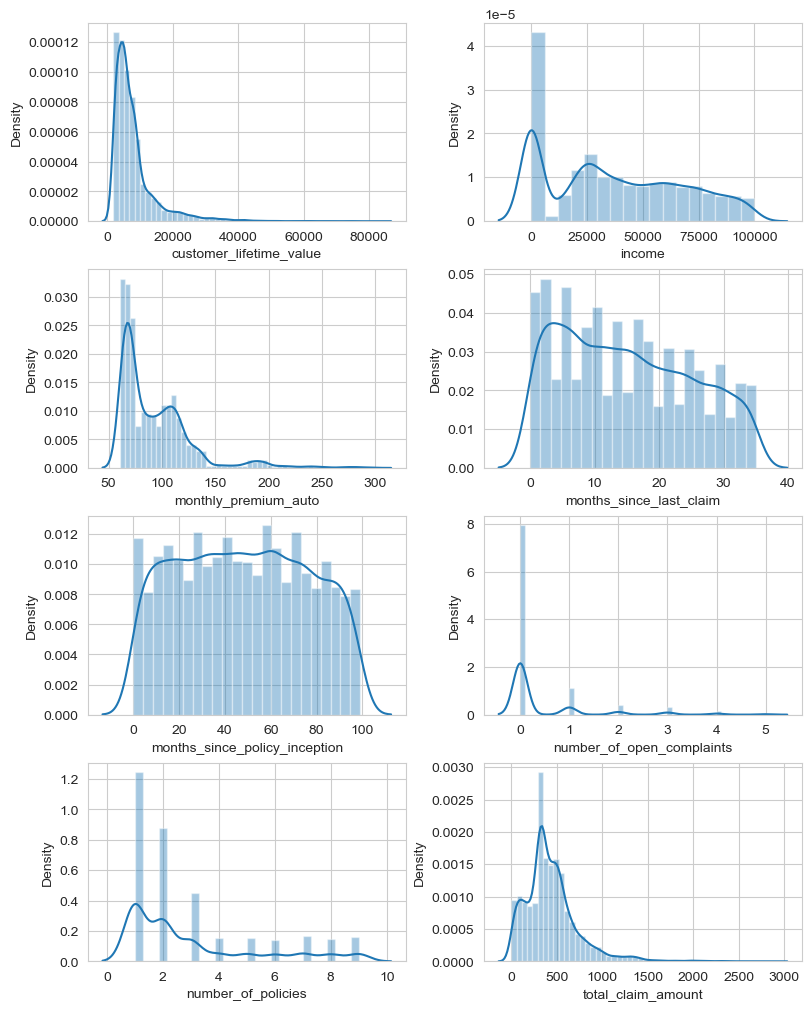

In [22]:
# quick check for distribution (look at the data to see which data can we use in time-series plot)

fig = plt.figure(figsize = (8, 10), constrained_layout = True)

for i, column in enumerate(numerical.columns):
    fig.add_subplot(4, 2, i + 1) # plot in 4 rows, 2 columns
    sns.distplot(numerical[column])

In [23]:
# select data for plotting time-series
    # x = effective_to_date
    # y = customer_lifetime_value and total_claim_amount (monthly_premium_auto???) >> I decided to include monthly_premium_auto in the plot

# get all data, preparing for time series plot
customer_value = df[['effective_to_date', 'customer_lifetime_value', 'total_claim_amount', 'monthly_premium_auto']]
customer_value.head()

,effective_to_date,customer_lifetime_value,total_claim_amount,monthly_premium_auto
0,2011-02-24,2763.519279,384.811147,69
1,2011-01-31,6979.535903,1131.464935,94
2,2011-02-19,12887.431650,566.472247,108
3,2011-01-20,7645.861827,529.881344,106
4,2011-02-03,2813.692575,138.130879,73


In [24]:
customer_value.describe()

,customer_lifetime_value,total_claim_amount,monthly_premium_auto
count,9134.000000,9134.000000,9134.000000
mean,8004.940475,434.088794,93.219291
std,6870.967608,290.500092,34.407967
min,1898.007675,0.099007,61.000000
25%,3994.251794,272.258244,68.000000
50%,5780.182197,383.945434,83.000000
75%,8962.167041,547.514839,109.000000
max,83325.381190,2893.239678,298.000000


### Time-series plot

What can we see if we go ahead and do a time-series plot from this dataset?

Text(0.5, 1.0, 'Customer Lifetime Value')

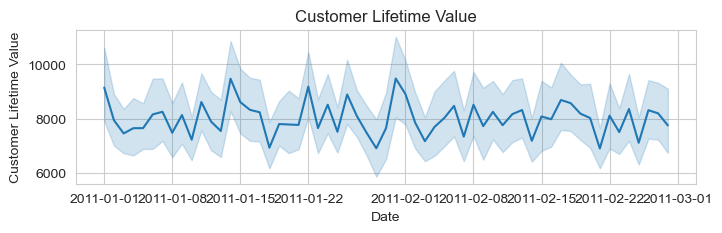

In [25]:
fig, ax = plt.subplots(figsize=(8, 2))

ax = sns.lineplot(data=customer_value, x='effective_to_date', y='customer_lifetime_value')
plt.xlabel('Date')
plt.ylabel('Customer Lifetime Value')
plt.title('Customer Lifetime Value')

Text(0.5, 1.0, 'Total Claim Amount')

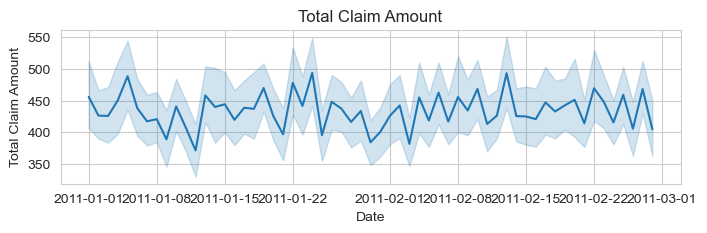

In [26]:
fig, ax = plt.subplots(figsize=(8, 2))

ax = sns.lineplot(data=customer_value, x='effective_to_date', y='total_claim_amount')
plt.xlabel('Date')
plt.ylabel('Total Claim Amount')
plt.title('Total Claim Amount')

Text(0.5, 1.0, 'Premium Auto')

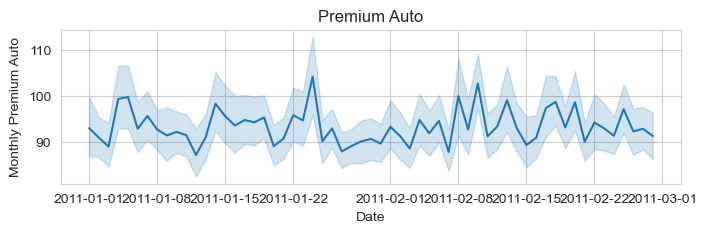

In [27]:
# Since values (in the y-axis) are highly varied in ranges, this cannot be in 1 plot >> need to plot them separately

fig, ax = plt.subplots(figsize=(8, 2))

ax = sns.lineplot(data=customer_value, x='effective_to_date', y='monthly_premium_auto')
plt.xlabel('Date')
plt.ylabel('Monthly Premium Auto')
plt.title('Premium Auto')

## What do those plots tell us?

- With those plots above, I did not find any significant change in those "customer_lifetime_value, total_claim_amount, monthly_premium_auto".

- It could be that the period is too short (only 2 months) combination with only slighly change in the values. Therefore, using time-series plot might not be a proper idea to see the change (increase or decrease) for those data.

- Also, does this plot automatically plot the data between .25 - .75 percentile?? Because it seems that the max and min values were not included in the graph.


### My next question
- What if we accumulate those values into each month? What can we see from there?

In [28]:
# extract month
customer_value['month'] = customer_value['effective_to_date'].dt.month

In [29]:
customer_value = customer_value.drop(['effective_to_date'], axis=1) # drop effective_to_date because we don't need this anymore

In [30]:
customer_value.sort_values(by=['month'])

,customer_lifetime_value,total_claim_amount,monthly_premium_auto,month
4566,2753.312714,425.817950,73,1
3913,4726.869327,839.348464,124,1
3912,2719.506996,345.600000,72,1
3911,4654.841089,577.385463,67,1
3910,5021.686245,306.818754,126,1
...,...,...,...,...
4173,4754.653816,8.315904,61,2
4172,5608.172012,350.400000,73,2
4163,3748.993430,354.081091,94,2
4157,10083.486880,571.479602,90,2


#### If we go ahead do the lineplot from this dataset
It seems that we see:


            - decreasing in "customer_lifetime_value" over 2 months   
            - increasing in "total_claim_amount" and "monthly_premium_auto"
            
      (see graphs below)

Text(0, 0.5, 'Customer Lifetime Value')

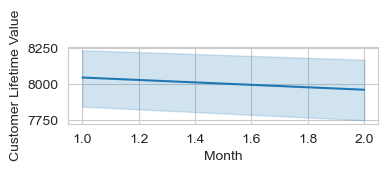

In [31]:
fig, ax = plt.subplots(figsize=(4, 1))

ax = sns.lineplot(data=customer_value, x='month', y='customer_lifetime_value')
plt.xlabel('Month')
plt.ylabel('Customer Lifetime Value')

Text(0, 0.5, 'Total Claim Amount')

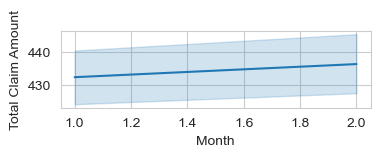

In [32]:
fig, ax = plt.subplots(figsize=(4, 1))

ax = sns.lineplot(data=customer_value, x='month', y='total_claim_amount')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')

Text(0, 0.5, 'Monthly Premium Auto')

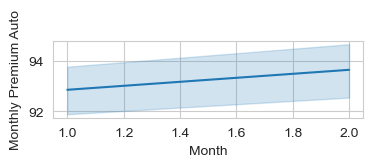

In [33]:

fig, ax = plt.subplots(figsize=(4, 1))

ax = sns.lineplot(data=customer_value, x='month', y='monthly_premium_auto')
plt.xlabel('Month')
plt.ylabel('Monthly Premium Auto')

### What does the line plot do from those data??

- As it automatically sets interval (here 0.2) from 1 to 2. Does that mean it automatically arrange/calculate/add/sum those values to fit those ticks? And how does it do that?

        - My guess, because our x (month) is 1, 2. I think, it accumates data (automatically)
        - But if that's the case, then why we see the decrease in "customer_lifetime_value"?
        - From this point, I don't understand the plots at all?!


So my next question is:
- Is this plot appropriate for this dataset? Does it well explain the data? (I do not think it's a good representative for this dataset)
- How can I prove the trends that we see from the plots above are right or wrong?

Note: I don't understand it completely but I have some questions after seeing those plots


   month  customer_lifetime_value
0      1             3.939896e+07
1      2             3.371816e+07


Text(9.444444444444445, 0.5, 'Customer Lifetime Value')

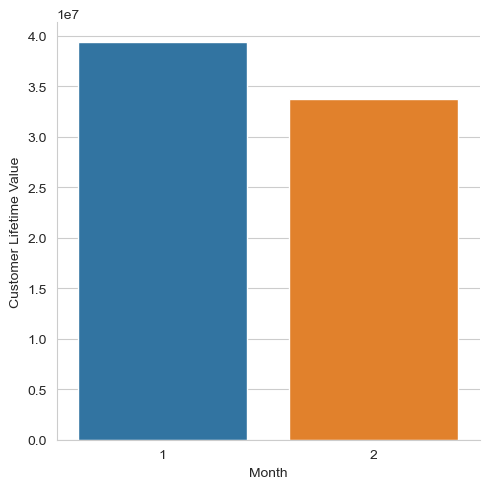

In [34]:
# So here I try different approach >> sum up the value for each month & then plot again (bar plot)


lifetime_df = pd.DataFrame(customer_value.groupby(customer_value.month)['customer_lifetime_value'].sum()).reset_index()
print(lifetime_df)

sns.catplot(data=lifetime_df, kind='bar', x='month', y='customer_lifetime_value')
plt.xlabel('Month')
plt.ylabel('Customer Lifetime Value')


   month  total_claim_amount
0      1        2.117143e+06
1      2        1.847824e+06


Text(1.6944444444444446, 0.5, 'Total Claim Amount')

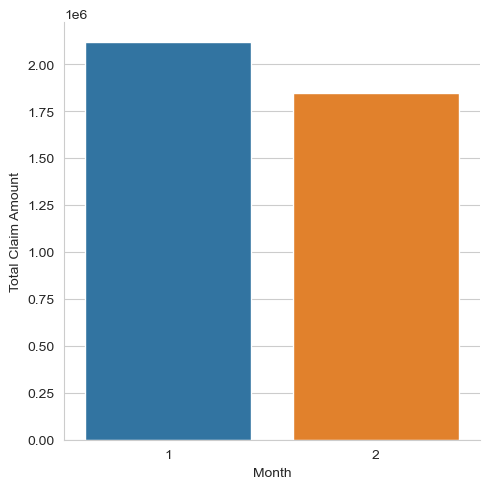

In [36]:
# What are the total monthly_premium_auto per month
total_claim_df = pd.DataFrame(customer_value.groupby(customer_value.month)['total_claim_amount'].sum()).reset_index()
print(total_claim_df)

sns.catplot(data=total_claim_df, kind='bar', x='month', y='total_claim_amount')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')

######## ignore below this line ######## 
# sns.lineplot(data=total_claim_df, x='month', y='total_claim_amount')

   month  monthly_premium_auto
0      1                454791
1      2                396674


Text(-17.680555555555557, 0.5, 'Monthly Premium Auto')

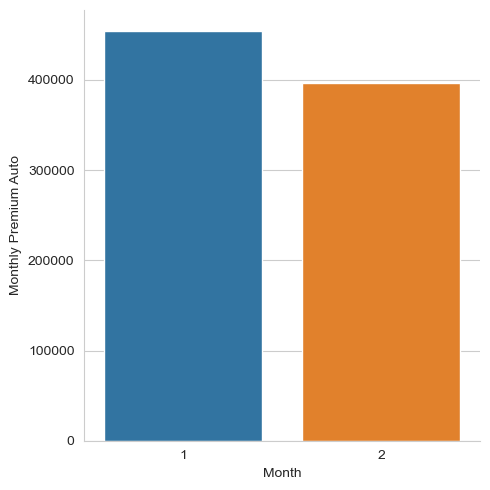

In [35]:
# What are the total monthly_premium_auto per month

premium_auto_df = pd.DataFrame(customer_value.groupby(customer_value.month)['monthly_premium_auto'].sum()).reset_index()
print(premium_auto_df)

sns.catplot(data=premium_auto_df, kind='bar', x='month', y='monthly_premium_auto')
plt.xlabel('Month')
plt.ylabel('Monthly Premium Auto')

### What now?


- With total values for each month. We see all the data ("customer_lifetime_value", "total_claim_amount", "monthly_premium_auto") are decreasing in month 2, which is inconsistent with the plots above.

???
So what does the line plot do?? 

